# Brooks Tawil
# ECE: 445 Machine Learning for Engineers
## Mini Jupyter exercise 1

##### The GDP for the US in trillions of USD:
<table>
  <tr>
    <td>Year</td>
    <td>1930</td> 
    <td>1940</td>
    <td>1950</td>
    <td>1960</td>
    <td>1970</td>
    <td>1980</td>
    <td>1990</td>
    <td>2000</td>
    <td>2010</td>
  </tr>
  <tr>
    <td>GDP</td>
    <td>1.015</td> 
    <td>1.33</td>
    <td>2.29</td>
    <td>3.26</td>
    <td>4.951</td>
    <td>6.759</td>
    <td>9.366</td>
    <td>13.131</td>
    <td>15.599</td>
  </tr>
</table>

### Question 1

Plot the GDP as a function of the year in Jupyter.

First import the relevant libraries and set the data.

In [1]:
import matplotlib.pyplot as plt
import numpy

In [2]:
year = list(range(1930, 2020, 10))
GDP = [1.015, 1.33, 2.29, 3.26, 4.951, 6.759, 9.366, 13.131, 15.599]

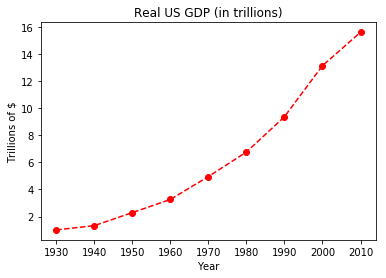

In [3]:
# Using matplotlib to make the graph
plt.plot(year, GDP, '--or')
plt.title('Real US GDP (in trillions)')
plt.xlabel('Year')
plt.ylabel('Trillions of $')
plt.show()

### Question 2

Based on the obtained plot, what is a possible mathematical relationship between GDP and Year?

When looking at it initially, the data appears to be following some sort of poilynomial relationship. The rate of change in GDP appears to increase and a 2nd degree polynomial would be a good starting point. 

The rate of change increasing can be seenvisually, but also by looking at the difference between the values between each data point, and the one before it:

In [4]:
GDP_Rate = [t - s for s, t in zip(GDP, GDP[1:])]
GDP_Rate_Format = ['%.3f' % elem for elem in GDP_Rate]
print (GDP_Rate_Format)

['0.315', '0.960', '0.970', '1.691', '1.808', '2.607', '3.765', '2.468']


Seeing that the difference between adjacent points isincreasing, would mean that  linear models would not be able to fully express the relation ship between GDP and Year.

Additonally, the relationship can be adjusted to follow range the data lies with (years 1930-2010):

$$
\begin{align}
y & = a(x - n)^2 + c
\end{align}
$$

Finding the right values of a, n, and c would demonstrate this relationship more clearly on the graph using the given data.

Knowing the data starts with a GDP of 1.015 trillion in 1930 gives us a value for $c$.

Additionally, we want to polynomial to be adjusted for the years 1930-2010, so we would need to have an n such that the polynomial is centered around 1930, not the origin. So an adjustment of $n = 1930$ would help.

Finally, the selection of a effects the bowing of the polynomial. Finding the proper value of $a$. In this case, adjusting fir a value of a that matches the first and last availible data points would allow for a polynomial that closely follows the path of the data as a whole. 

Using the chosen values of $a, n,$ and $c$ the relationship can be overlayed on top of the previous graph.

### Question 3

Plot another curve that follows the mathematical relationship you have derived/argued between GDP
and Year.

Setting the variables $a, n,$ and $c$ gives the following model:
$$
\begin{align}
y & = 0.0023(x - 1930)^2 + 1.015
\end{align}
$$

In [5]:
a = 0.0023
n = 1930
c = 1.015
GDP_Model = numpy.array(year)
GDP_Model = a*(GDP_Model - n)**2 + c
print (GDP_Model)

[ 1.015  1.245  1.935  3.085  4.695  6.765  9.295 12.285 15.735]


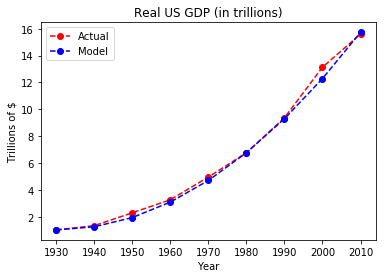

In [6]:
# Using matplotlib to make the graph
plt.plot(year, GDP, '--or')
plt.title('Real US GDP (in trillions)')
plt.xlabel('Year')
plt.ylabel('Trillions of $')
plt.plot(year, GDP_Model, '--ob')
plt.legend(['Actual', 'Model'])
plt.show()